<a href="https://colab.research.google.com/github/Sagargomad/My_projects/blob/main/prediction_of_solid_solubility%2C_finding_relative_importance_of_factors_affecting_solid_solubility_in_binary_Ti_alloys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('/content/drive/MyDrive/Mtech project/Ti dataset.csv')
features.head(5)

,element,atomic radius,electronegativity of solute,Valence,Crystal structure,atomic weight,Cohesive energy,atomic weight factor,electronegativity factor,atomic size factor,solubility
0,H,1.10,2.20,1.0,HCP,1.008000,1.00,0.978942,-0.66,0.478673,7.5
1,Li,1.82,0.98,1.0,BCC,6.940000,1.63,0.855015,0.56,0.137441,0.0
2,Be,1.53,1.57,2.0,HCP,9.012183,3.32,0.811725,-0.03,0.274882,0.0
3,B,1.92,2.04,3.0,OTHER,10.810000,5.81,0.774166,-0.50,0.090047,0.0
4,C,1.70,2.55,4.0,HCP,12.011000,7.37,0.749076,-1.01,0.194313,1.2


In [ ]:
features=features.dropna()
feature=features.reset_index(drop=True)

In [ ]:
print('The shape of our features is:', features.shape)

The shape of our features is: (64, 11)


In [ ]:
features.columns


Index(['element', 'atomic radius', 'electronegativity of solute', 'Valence',
       'Crystal structure ', 'atomic weight', 'Cohesive energy',
       'atomic weight factor', 'electronegativity factor',
       'atomic size factor', 'solubility'],
      dtype='object')

In [ ]:
# Descriptive statistics for each column
features.describe()

,atomic radius,electronegativity of solute,Valence,atomic weight,Cohesive energy,atomic weight factor,electronegativity factor,atomic size factor,solubility
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2.127656,1.672500,3.671875,99.405300,3.871609,-1.076698,-0.132500,-0.008368,8.806000
std,0.335222,0.626945,1.652844,62.538155,2.128532,1.306498,0.626945,0.158873,22.170336
min,1.100000,0.000000,1.000000,1.008000,0.670000,-3.365855,-1.900000,-0.625592,0.000000
25%,2.007500,1.235000,2.750000,47.139225,2.187500,-2.202321,-0.560000,-0.072275,0.034750
50%,2.130000,1.740000,3.500000,94.428185,3.460000,-0.972720,-0.200000,-0.009479,1.000000
75%,2.262500,2.100000,5.000000,153.285500,5.017500,0.015204,0.305000,0.048578,5.025000
max,3.430000,3.440000,7.000000,208.980400,8.900000,0.978942,1.540000,0.478673,100.000000


In [ ]:
import numpy as np

In [ ]:
# Create dummy variables for the catgeorical variable crystal structure
features['BCC'] = np.where(features['Crystal structure ']=='BCC', 1, 0)
features['FCC'] = np.where(features['Crystal structure ']=='FCC', 1, 0)
features['HCP'] = np.where(features['Crystal structure ']=='HCP', 1, 0)
#dataset['ORTHOROMBIC'] = np.where(dataset['Crystal structure']=='ORTHOROMBIC', 1, 0)
#dataset['MONOCLINIC'] = np.where(dataset['Crystal structure']=='MONOCLINIC', 1, 0)
features['OTHER'] = np.where(features['Crystal structure ']=='OTHER', 1, 0)

In [ ]:
features.rename(columns={'solubility':'actual'}, inplace=True)

In [ ]:
features=features[[ 'atomic size factor',
       'electronegativity factor', 'Valence',
       'BCC','FCC','HCP','OTHER','actual']]

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['actual'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (51, 7)
Training Labels Shape: (51,)
Testing Features Shape: (13, 7)
Testing Labels Shape: (13,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(rf, features,labels, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: -0.39448167895000297
Accuracy for the fold no. 1 on the test set: 0.2039270087414945
Accuracy for the fold no. 2 on the test set: 0.7029856196844195
Accuracy for the fold no. 3 on the test set: -28.96864201511027
Accuracy for the fold no. 4 on the test set: 0.430339887860561


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 15.54 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


<ipython-input-17-f46941e48193>:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / test_labels)


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
predictions_train = rf.predict(train_features)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(train_labels, predictions_train)

27.562781910098277

In [ ]:
mean_squared_error(test_labels, predictions)

758.6220367811361

In [ ]:
r2_score(test_labels, predictions)

0.00802052480378801

In [ ]:
r2_score(train_labels, predictions_train)

0.9291493787452546

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: atomic size factor   Importance: 0.44
Variable: electronegativity factor Importance: 0.36
Variable: Valence              Importance: 0.14
Variable: HCP                  Importance: 0.05
Variable: OTHER                Importance: 0.01
Variable: BCC                  Importance: 0.0
Variable: FCC                  Importance: 0.0


In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('atomic size factor'), feature_list.index('electronegativity factor'),feature_list.index('Cohesive energy'),feature_list.index('atomic weight factor'),feature_list.index('Valence')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

ValueError: ignored

In [ ]:
predictions_train = rf_most_important.predict(train_important)

In [ ]:
mean_squared_error(train_labels, predictions_train)

34.43960696654071

In [ ]:
mean_squared_error(test_labels, predictions)

950.9523593587195

In [ ]:
r2_score(test_labels, predictions)

-0.24347194866079702

In [ ]:
r2_score(train_labels, predictions_train)

0.9114723775957212

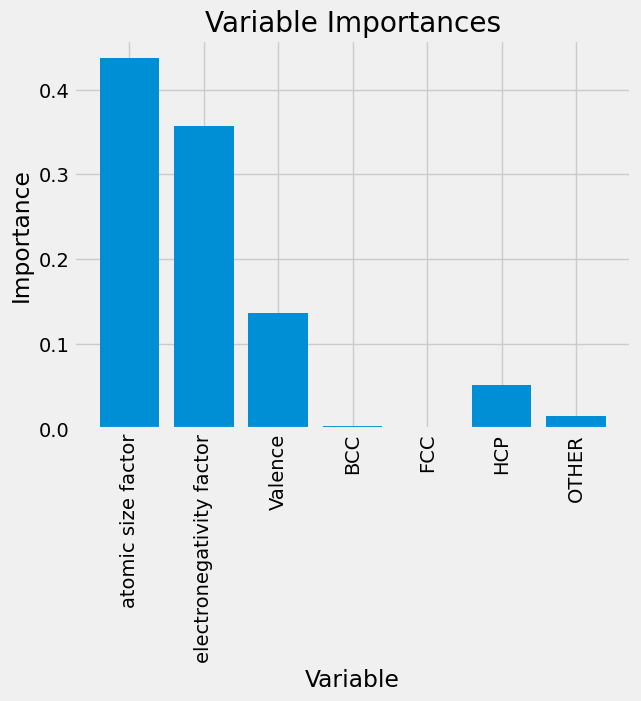

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# Make the data accessible for plotting
true_data['atomic size factor'] = features[:, feature_list.index('atomic size factor')]
true_data['electronegativity factor'] = features[:, feature_list.index('electronegativity factor')]
true_data['heat of mixing' ] = features[:, feature_list.index('heat of mixing' )]
true_data['Cohesive energy' ] = features[:, feature_list.index('Cohesive energy' )]


NameError: ignored

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: atomic size factor   Importance: 0.44
Variable: electronegativity factor Importance: 0.36
Variable: Valence              Importance: 0.14
Variable: HCP                  Importance: 0.05
Variable: OTHER                Importance: 0.01
Variable: BCC                  Importance: 0.0
Variable: FCC                  Importance: 0.0


[None, None, None, None, None, None, None]

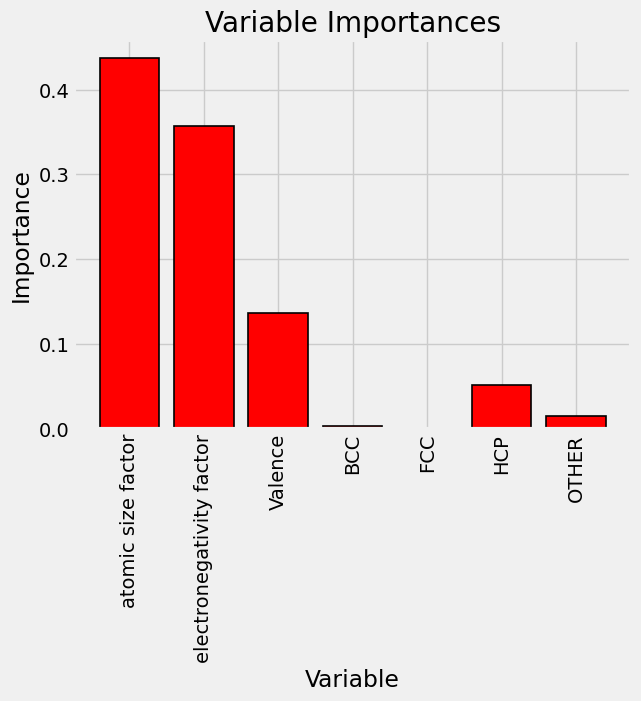

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

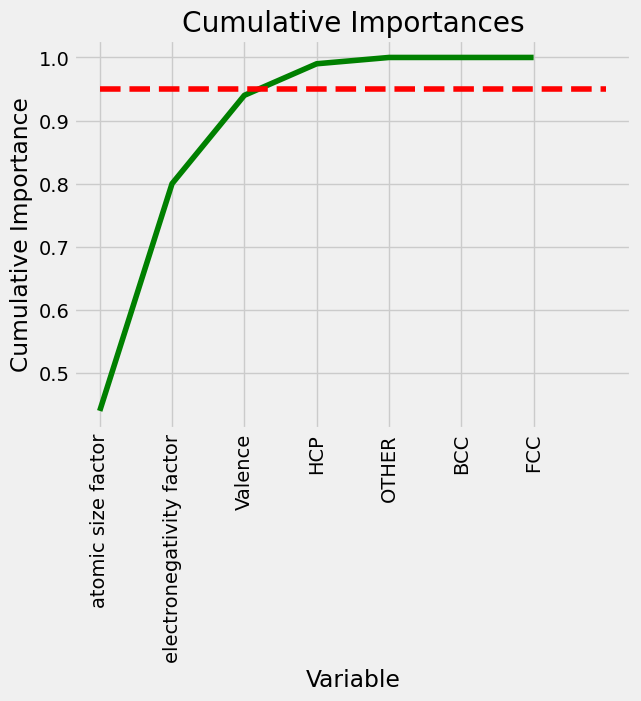

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [ ]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 8


In [ ]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (50, 5)
Important test features shape: (17, 5)


In [ ]:
# Train the expanded model on only the important features
rf.fit(important_train_features, train_labels);
# Make predictions on test data
predictions = rf.predict(important_test_features)
# Performance metrics
errors = abs(predictions - test_labels)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 17.68 degrees.
Accuracy: -inf %.


<ipython-input-39-6bee6b85fa70>:9: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / test_labels)


In [ ]:
r2_score(test_labels, predictions)

0.43940765620137145

In [ ]:
predictions_train = rf.predict(important_train_features)

In [ ]:
r2_score(train_labels, predictions_train)

0.9313009235118633

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(rf,features,labels, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: -31.79201846277818
Accuracy for the fold no. 1 on the test set: -0.7041214303280259
Accuracy for the fold no. 2 on the test set: 0.5227274106939601
Accuracy for the fold no. 3 on the test set: -545.0451650978493
Accuracy for the fold no. 4 on the test set: 0.261749437321554


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_estimator_

AttributeError: ignored

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 18.9725 degrees.
Accuracy = nan%.


<ipython-input-49-e50d9bd78ab1>:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
<ipython-input-49-e50d9bd78ab1>:4: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

NameError: ignored

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy)

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 8],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 10}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 20.1442 degrees.
Accuracy = -inf%.


<ipython-input-49-e50d9bd78ab1>:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of nan%.
